In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
diamonds = pd.read_csv("diamonds_train.csv", index_col=0)
diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965


In [3]:
diamonds = diamonds.drop(["table", "depth"], axis=1)

In [4]:
diamonds["price"] = diamonds["price"].astype(float)

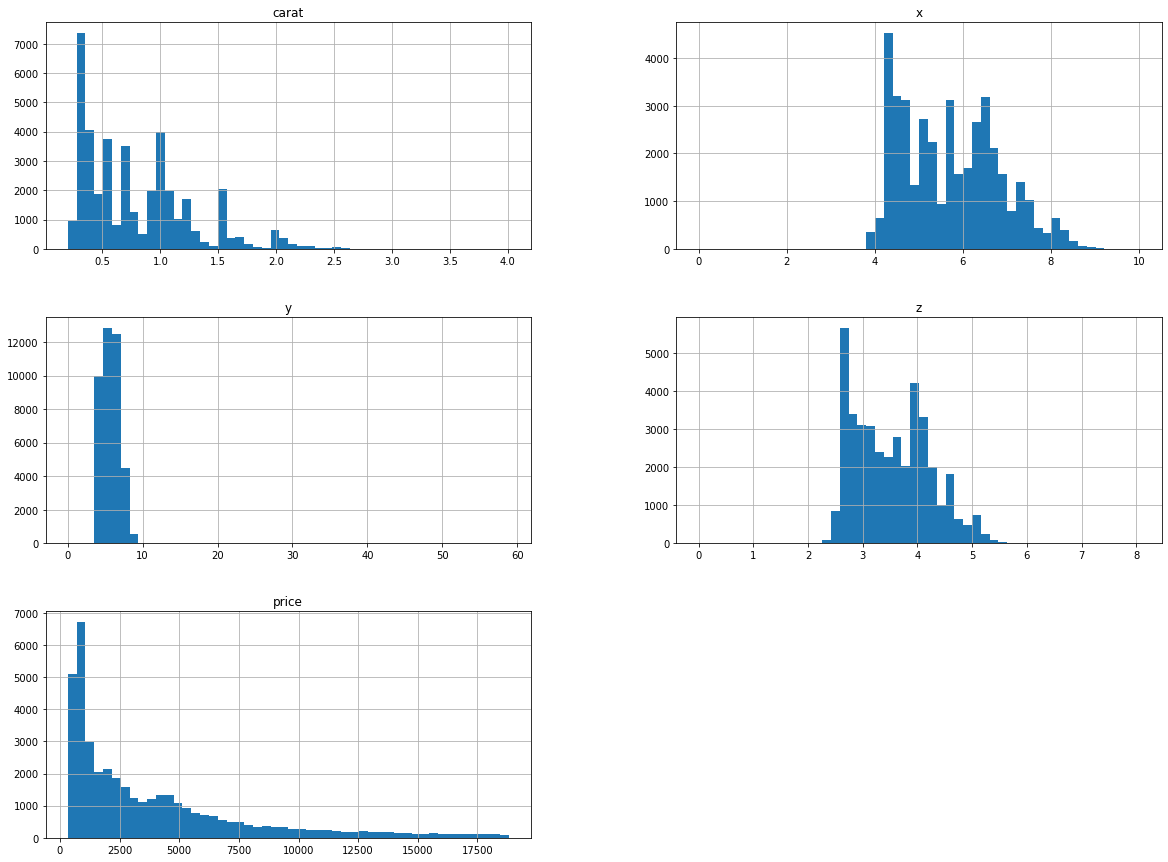

In [5]:
diamonds.hist(bins = 50, figsize = (20, 15))
plt.show()

In [6]:
diamonds["carat_cat"] = np.ceil(diamonds["carat"] / 0.35)

# Merge categories > 5 in 5
diamonds["carat_cat"].where(diamonds["carat_cat"] < 5, 5.0, inplace = True)

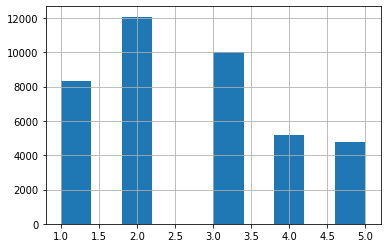

In [7]:
diamonds["carat_cat"].hist()
plt.show()

In [8]:
# Import the sklearn module
from sklearn.model_selection import StratifiedShuffleSplit

# Run the split. Creates on split and shares 20% of the dataset for the test set
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 235)

# Separate the stratified train set and the test set
for train_index, test_index in split.split(diamonds, diamonds["carat_cat"]):
    strat_train_set = diamonds.loc[train_index]
    strat_test_set = diamonds.loc[test_index]

In [9]:
for set in (strat_train_set, strat_test_set):
    set.drop(["carat_cat"], axis = 1, inplace = True)

In [10]:
diamonds = strat_train_set.copy()
diamonds.head()

,carat,cut,color,clarity,x,y,z,price
28541,0.32,Very Good,H,VVS2,4.34,4.39,2.71,645.0
29449,0.23,Very Good,E,VS2,3.85,3.92,2.48,352.0
15236,0.34,Very Good,E,VVS2,4.50,4.53,2.78,819.0
7464,1.15,Ideal,F,VS1,6.76,6.82,4.15,10316.0
24071,0.33,Premium,G,VS1,4.42,4.46,2.72,666.0


In [11]:
diamonds = strat_train_set.drop("price", axis = 1)

# Set a new dataset label variable
diamond_labels = strat_train_set["price"].copy()

# Drop all the category, so we could have only numeric
diamonds_num = diamonds.drop(["cut", "color", "clarity"], axis = 1)
diamonds_num.head()

,carat,x,y,z
28541,0.32,4.34,4.39,2.71
29449,0.23,3.85,3.92,2.48
15236,0.34,4.50,4.53,2.78
7464,1.15,6.76,6.82,4.15
24071,0.33,4.42,4.46,2.72


In [12]:
from sklearn.preprocessing import StandardScaler

# Perform the feature scaling on the numeric attributes of the dataset
num_scaler = StandardScaler()
diamonds_num_scaled = num_scaler.fit_transform(diamonds_num)

# Preview 
pd.DataFrame(diamonds_num_scaled).head()

,0,1,2,3
0,-1.010121,-1.238017,-1.195125,-1.187850
1,-1.201505,-1.676138,-1.614993,-1.519464
2,-0.967591,-1.094957,-1.070058,-1.086924
3,0.754862,0.925766,0.975682,0.888345
4,-0.988856,-1.166487,-1.132591,-1.173432


In [13]:
diamonds_cat = diamonds[["cut", "color", "clarity"]]
diamonds_cat.head()

,cut,color,clarity
28541,Very Good,H,VVS2
29449,Very Good,E,VS2
15236,Very Good,E,VVS2
7464,Ideal,F,VS1
24071,Premium,G,VS1


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Perform the one-hot encoding on the category attributes of the dataset
cat_encoder = OneHotEncoder()
diamonds_cat_encoded = cat_encoder.fit_transform(diamonds_cat)

# Convert the encoded categories to arrays and Preview
pd.DataFrame(diamonds_cat_encoded.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
from sklearn.compose import ColumnTransformer

num_attribs = list(diamonds_num)
cat_attribs = ["cut", "color", "clarity"]

# Pipeline to transform our dataset
pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs), # Perform feaured scaling on numeric attributes
    ("cat", OneHotEncoder(), cat_attribs) # Perform One-Hot encoding on the category attributes
])

In [16]:
diamonds_ready = pipeline.fit_transform(diamonds)

# Preview
pd.DataFrame(diamonds_ready).head()

,0
0,"(0, 0)\t-1.0101208908462533\n (0, 1)\t-1.23..."
1,"(0, 0)\t-1.2015046026804734\n (0, 1)\t-1.67..."
2,"(0, 0)\t-0.9675911771053155\n (0, 1)\t-1.09..."
3,"(0, 0)\t0.754862229402665\n (0, 1)\t0.92576..."
4,"(0, 0)\t-0.9888560339757844\n (0, 1)\t-1.16..."


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

# Our test set

# Remove label from test set
X_test = strat_test_set.drop("price", axis = 1)
# Have label stand alone
y_test = strat_test_set["price"].copy()

# Our models performance holder
models_rmse = [] # Holds Models original RMSE
cvs_rmse_mean = [] # Holds the Cross Validation RMSE Mean
tests_rmse = [] # Holds the tests RMSE
tests_accuracy = [] # Holds the tests accuracy
models = [] # Holds the models name

def display_model_performance(model_name, model, diamonds = diamonds_ready, labels = diamond_labels,
                              models_rmse = models_rmse, cvs_rmse_mean = cvs_rmse_mean, tests_rmse = tests_rmse,
                              tests_accuracy = tests_accuracy, pipeline = pipeline, X_test = X_test,
                              y_test = y_test, cv = True):
    # Fit dataset in model
    model.fit(diamonds, labels)
    
    # Setup predictions
    predictions = model.predict(diamonds)
    
    # Get models performance
    model_mse = mean_squared_error(labels, predictions)
    model_rmse = np.sqrt(model_mse)
    
    # Cross validation
    cv_score = cross_val_score(model, diamonds, labels, scoring = "neg_mean_squared_error", cv = 10)

    cv_rmse = np.sqrt(-cv_score)
    cv_rmse_mean = cv_rmse.mean()
    
    print("RMSE: %.4f" %model_rmse)
    models_rmse.append(model_rmse)
    
    print("CV-RMSE: %.4f" %cv_rmse_mean)
    cvs_rmse_mean.append(cv_rmse_mean)
    
    print("--- Test Performance ---")
    
    X_test_prepared = pipeline.transform(X_test)
    
    # Fit test dataset in model
    model.fit(X_test_prepared, y_test)
    
    # Setup test predictions
    test_predictions = model.predict(X_test_prepared)
    
    # Get models performance on test

    test_model_mse = mean_squared_error(y_test, test_predictions)
    test_model_rmse = np.sqrt(test_model_mse)
    print("RMSE: %.4f" %test_model_rmse)
    tests_rmse.append(test_model_rmse)
    
    # Tests accuracy
    test_accuracy = round(model.score(X_test_prepared, y_test) * 100, 2)
    print("Accuracy:", str(test_accuracy)+"%")
    tests_accuracy.append(test_accuracy)
    
    # Check how well model works on Test set by comparing prices
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 7]
    some_labels = y_test.iloc[start:start + 7]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:\t", model.predict(some_data_prepared))
    print("Labels:\t\t", list(some_labels))

    models.append(model_name)

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize = True)
display_model_performance("Linear Regression", lin_reg)

RMSE: 1108.6576
CV-RMSE: 1110.5734
--- Test Performance ---
RMSE: 1159.7010
Accuracy: 91.45%
Predictions:	 [14657.21103231 10342.05413411  4493.57107862   784.24512154
  4896.20434811  3444.15276887 -2213.3638173 ]
Labels:		 [16723.0, 8227.0, 3878.0, 731.0, 3696.0, 3267.0, 468.0]


In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 235)
display_model_performance("Decision Tree Regression", tree_reg)

RMSE: 13.1395
CV-RMSE: 763.9111
--- Test Performance ---
RMSE: 8.2919
Accuracy: 100.0%
Predictions:	 [ 2812.  6371.  1927. 12364.  3945.  3880.  6745.]
Labels:		 [2812.0, 6371.0, 1927.0, 12364.0, 3945.0, 3880.0, 6745.0]


In [20]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 235)
display_model_performance("Random Forest Regression", forest_reg)

RMSE: 243.0154
CV-RMSE: 588.4539
--- Test Performance ---
RMSE: 285.2335
Accuracy: 99.48%
Predictions:	 [ 8514.8  3004.2 16897.8  4261.1  2907.   4483.6  4680.8]
Labels:		 [7688.0, 2938.0, 17539.0, 4434.0, 2863.0, 4390.0, 4455.0]


### PREDECIR TEST

In [23]:
X_pred = pd.read_csv("diamonds_test.csv", index_col = 0)
X_pred = X_pred.drop(["depth", "table"], axis=1)

In [25]:
X_pred_prepared = pipeline.transform(X_pred)
X_pred_prepared

<13449x24 sparse matrix of type '<class 'numpy.float64'>'
	with 94143 stored elements in Compressed Sparse Row format>

In [26]:
predictions_submit = forest_reg.predict(X_pred_prepared)

In [27]:
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})
submission

,id,price
0,0,431.5
1,1,1095.9
2,2,9626.3
3,3,498.0
4,4,10181.8
...,...,...
13444,13444,4756.1
13445,13445,448.8
13446,13446,14169.1
13447,13447,9668.0


In [34]:
submission.to_csv("submission2.csv", index = False)